<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<h1>Algorísmica Avançada</h1>
<h2>Programació dinàmica - SEAM CARVING</h2>
</center>
</div>

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import random
from matplotlib import pyplot as plt
import scipy.ndimage as nd
from tqdm.notebook import trange

%matplotlib inline

## Problema 1: Implementació de l'algorisme Seam Carving

L'algorisme Seam Carving ens permet reduir la mida de les imatges en una de les seves dues dimensions (horitzontalment, per exemple) a través d'un algorisme senzill de programació dinàmica. Ens permet fer la següent reducció:

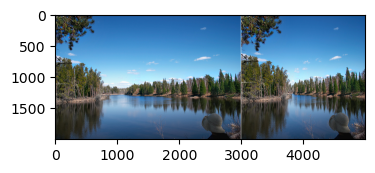

In [13]:
im = plt.imread('img/seamcarving.jpg')
plt.subplots(figsize=(4, 2))
plt.imshow(im)
plt.show()

Sembla màgia, no?

S'agafa la imatge original i se'n calcula el gradient. A continuació es generen tots els camins a través de la programació dinàmica, es troba un camí mínim i s'elimina. Es repeteix aquest procediment fins a obtenir el resultat desitjat. Observa'n un altre exemple:

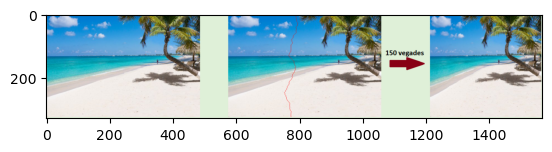

In [14]:
im = plt.imread('img/seamcarving_alg.png')
plt.imshow(im)
plt.show()

En aquest cas hem reduit la imatge original en 150 píxels, horitzontalment. Com veieu, la major part dels objectes es conserven ja que s'han eliminat zones 'suaus' com el cel i la sorra.

Implementació
 
Implementeu una funció <code>superior_neighbors</code> que retorni els veïns superiors d'un punt d'una imatge 2-D. A la capçalera de la funció trobareu els tres casos que cal tenir en compte

Implementeu una funció <code>minimal_paths</code> que, usant el següent algorisme de programació dinàmica, construeixi la matriu de camins, $D$. Aquesta funció ha d'usar la funció <code>superior_neighbors</code> per obtenir els veïns.<br>
            
Sigui $G$ la imatge de gradient i sigui $D$ la matriu de camins mínims que hem d'omplir, ambdues de dimensió $H \times W$ :
            
$$D_{i,j} = \begin{cases}
            G_{i,j}+\min\Big(D_{i-1, j},\ D_{i-1,j+1}\Big) \quad \text{if} \ j=0\\
            G_{i,j}+\min\Big(D_{i-1, j-1},\ D_{i-1, j}\Big) \quad \text{if} \ j=W-1\\
            G_{i,j}+\min\Big(D_{i-1, j-1},\ D_{i-1, j},\ D_{i-1,j+1}\Big) \quad \text{else}                                      
\end{cases}$$

Implementeu una funció <code>find_min_path</code> que retorni el camí mínim sobre la imatge anterior, $D$. Per trobar-lo, l'algorisme ha de començar per la part inferior de la imatge i anar pujant fins a arribar a la part superior.
        
Implementeu una funció <code>delete_path</code> que elimini el camí mínim retornat per la funció anterior de la imatge original.

Implementeu una funció <code>reduce_image</code> que repeteixi tot el procés anterior un nombre finit de vegades, $N$.

Funcions auxiliars:

In [21]:
def get_gradient(im):
    """
    Donada una imatge, en calcula el gradient
    
    Params
    ======
    :im: Imatge de la que en volem calcular el gradient
    
    Returns
    =======
    :gradient: Gradient horitzontal de la imatge
    
    """
    
    # Transformem la imatge a un sol canal (blanc i negre)
    im_blackwhite = np.dot(im[...,:3], [0.299, 0.587, 0.114])
    
    # Calculem el gradient usant sobel
    gradient = np.abs(nd.sobel(im_blackwhite))
    return gradient


def show_row(im_and_titles):
    """
    Donat un conjunt d'imatges i els seus títols, els mostra en una sola línia
    
    Params
    ======
    :im_and_titles: Llista de tuples en el format [(im, title), ...]    
    """
    
    # Creem una figura d'una sola línia
    fig, axs = plt.subplots(1,len(im_and_titles),figsize=(len(im_and_titles)*2,5))
    
    # Iterem el conjunt d'imatges i mostrem la imatge amb el seu títol
    for i, (im, title) in enumerate(im_and_titles):
        axs[i].imshow(im)
        axs[i].set_title(title)
        axs[i].set_axis_off()

    
    plt.tight_layout()
    plt.show()
    
    
def add_min_path(im, path, color=[1,0,0]):
    """
    Donada una imatge i un camí, afegeix el camí en un color donat. Per defecte, vermell.
    
    Params
    ======
    :im: Imatge sense el camí
    :path: Camí que volem afegir
    :color: Color del camí
    
    Returns
    =======
    :im: Imatge amb el camí afegit
    """
    for i, j in path:
        im[i][j]=color
    return im

Exemple d'ús:

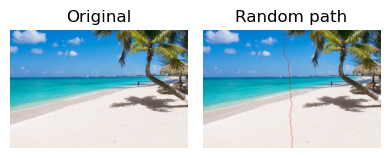

In [22]:
# Carreguem una imatge
im = plt.imread('img/beach.jpg')/255

# Creem un camí aleatori
i = im.shape[0]-1
path = [(i, im.shape[1]//2)]
while i >= 0:
    path.append((i, min(max(0, path[-1][1] + random.randint(-1,1)),im.shape[1]-1)))
    i-=1

# Afegim el camí a una imatge diferent
im_path = im.copy()
im_path = add_min_path(im_path, path)

# Usem la funció show_row per mostrar les imatges amb els seus títols.
im_titles = [(im, 'Original'), (im_path, 'Random path')]
show_row(im_titles)

## Gradient horitzontal

El <b>gradient horitzontal</b> d'una imatge ens permet trobar els punts de màxim canvi <b>vertical</b> en una imatge. Dit d'una altra forma, ens ressalta els contorns verticals.<br><br>
Observeu com podem usar la funció <code>get_gradient()</code> que us donem implementada:

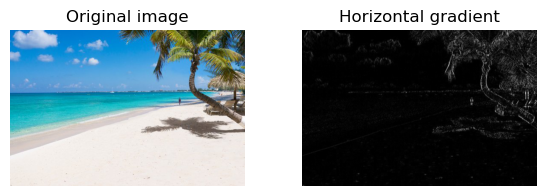

In [25]:
im = plt.imread('img/beach.jpg')/255

fig, axs = plt.subplots(1, 2, figsize=(6, 2))

# Mostrem la imatge
axs[0].imshow(im)
axs[0].set_title('Original image')
axs[0].set_axis_off()

# Mostrem el gradient horitzontal de la imatge
gradient = get_gradient(im)
axs[1].imshow(gradient, cmap='gray')
axs[1].set_title('Horizontal gradient')
axs[1].set_axis_off()

plt.tight_layout()
plt.show()

In [26]:
def superior_neighbors(mat, point):
    """
    Donada una matriu de mida H x W i punt, retorna els punts de la fila superior adjacents al punt passat com a paràmetre.
    Cal tenir en compte els següents casos. Considerant que el punt té coordenades (i,j):
        - Si el punt té coordenada j=0, vol dir que estem agafant un punt del marge esquerre de la imatge. Només s'han de retornar DOS veïns.
        - Si el punt té coordenada j=(W-1), vol dir que estem agafant un punt del marge dret de la imatge. Només s'han de retornar DOS veïns.
        - En la resta de casos, es retornen els tres veïns superiors.
        
    Params
    ======
    :mat: Una matriu 2-Dimensional
    :point: Un sol punt amb el format (i,j)
    
    Returns
    =======
    :neighbors: Una llista de dos o tres elements en funció de cada cas.
    """
    i, j = point
    
    neighbors = [(i-1,j)] #com a mínim sempre tindrà l'element de dalt seu
    
    W = mat.shape[1]
    
    if j == 0:
        neighbors.append((i-1, j+1))   #Si estem primera columna element de diagonal dreta
        return neighbors
    if j == W-1:
        neighbors.append((i-1, j-1))   #Si estem ultima columna element de diagonal esquerra
        return neighbors
        
    neighbors.append((i-1, j-1))
    neighbors.append((i-1, j+1)) #Alre cas, totes dos diagonals
    return neighbors


def minimal_paths(mat):
    """
    Creació de tots els camins mínims usant programació dinàmica.
    Cal usar la funció 'superior_neighbors' per trobar els veïns.
    
    Params
    ======
    :mat: Matriu 2-Dimensional d'entrada (gradient)
    
    Returns
    =======
    :ret: Matriu 2-Dimensional de la mateixa mida que 'mat' amb els camins mínims calculats.
    """
    
    ret = mat.copy()
    
    # Recorrem tota la matriu per files desde la segona fila sumant l'element 
    #    d'aquella posició amb el mínim dels 3 o 2 de dalt seu
    for i in range(1, mat.shape[0]):
        
        for j in range(mat.shape[1]):
            
            ret[i,j] = ret[i,j] + min([ret[x,y] for x,y in superior_neighbors(ret, (i,j))])
                
    return ret


def find_min_path(mat):
    """
    Donada una matriu, calcula el camí mínim sobre aquesta. L'algorisme ha de començar per la part inferior i buscar el següents punts.
    
    Params
    ======
    :mat: Matriu de camins mínims
    
    Returns
    =======
    :min_path: Una llista de tuples amb les coordenades (i,j) del camí mínim. La primera coordenada ha d'anar decrementant sempre en 1.
               Exemple. Suposant que una imatge té d'alçada 341 píxels, un possible camí seria: [(340, 120), (339, 121), (338,120), ..., (0, 151)] 
    """
    min_path = [] 
    
    i = mat.shape[0]-1 # i indica la fila en la que estem i sempre comencem en la última
    
    
    #trobem la coordenada mes petita de la ultima fila
    j = 0
    for x in range(1, mat.shape[1]):
        if mat[i,x] < mat[i,j]:
            j = x
    
    min_path.append((i,j))
    
    #desde el ultim punt afegit mirem quin dels 3 o 2 de dalt seu es el minim
    for i in range(mat.shape[0]-1, 0, -1):
        vei = np.argmin( [mat[x,y] for x,y in superior_neighbors(mat, (i,j))] ) #argmin troba la posicio en la llista del minim
        min_path.append(superior_neighbors(mat, (i,j))[vei]) # afegim la coordenada 
        j = superior_neighbors(mat, (i,j))[vei][1] #actualitzem la j perque la i s'actualitza en el bucle
        
    return min_path



def delete_path(im, path):
    """
    Donat una imatge i un camí, elimina els pixels de la imatge que pertanyen del camí.
    Podeu usar la següent instrucció per inicialitzar la imatge. Això crea una imatge amb tots els valors a zero.
    
    im_new = np.zeros((im.shape[0], im.shape[1]-1, im.shape[2]))
    
    Params
    ======
    :im: Una imatge de mida H x W x 3
    :path: Un camí sobre la imatge. 
    
    Returns
    =======
    :im_new: Una nova imatge de mida H x (W-1) x 3 amb el camí eliminat
    """
    
    im_new = np.zeros((im.shape[0], im.shape[1]-1, im.shape[2]))
    
    #Recorrem la matriu per files i copiarem cada casella saltant la coordenada que estigui al cami a eliminar
    for i in range(im.shape[0]):
        trobat = False # variable per comprobar si la casella a eliminar de la fila s'ha trobat
        
        for j in range(im.shape[1]): 
            if (i,j) in path:
                trobat = True
                
            if (i,j) not in path and not trobat: # si encara no sha trobat la coordenada la copiem tal qual
                im_new[i,j] = im[i,j]
                
            if (i,j) not in path and trobat: # si s'ha trobat haurà fet una iteracio mes, la copiem en una columna anterior
                im_new[i,j-1] = im[i,j]
            
    return im_new


def reduce_image(im, N=100):    
    """
    Implementació de l'algorisme Seam Carving. 
    Useu la funció 'show_row' al finalitzar per mostrar una figura amb tres subfigures:
        - Imatge original
        - Primer camí que s'elimina
        - Imatge resultant després de N iteracions
    
    Params
    ======
    :im: Imatge que volem reduir
    :N: Nombre de cops que repetirem l'algorisme
    """
    
    result = [(im, 'IMATGE INICIAL')]
    
    # 1a iteració per veure el primer camí eliminat
    im_gradient = get_gradient(im)
    
    gradient_paths = minimal_paths(im_gradient)
        
    cut = find_min_path(gradient_paths)
    
    im_2 = im.copy()
    
    for point in cut:
        im_2[point] = [1,0,0] #pintem de roig cada pixel del camí per veure per on tallara primer cop
        
    result.append((im_2, 'PRIMER TALL'))        
        
    new_im = delete_path(im_2, cut)
    
    for i in range(N-1): # Fem el mateix proces fins reduir la imatge N cops
        
        im_gradient = get_gradient(new_im) # 1r trobem el gradient de la matriu
        
        gradient_paths = minimal_paths(im_gradient) # Apliquem la funcio que escala la matriu de dalt a baix
        
        cut = find_min_path(gradient_paths) # Trobem el camí mínim d'aquesta matriu
        
        new_im = delete_path(new_im, cut) # Eliminem el camí
    
    result.append((new_im, 'IMATGE FINAL'))
    
    show_row(result)

Comproveu la vostra solució

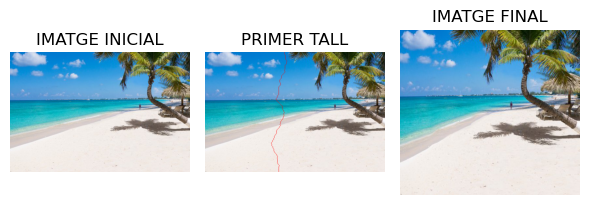

In [27]:
im = plt.imread('img/beach.jpg')/255
reduce_image(im, 150)

## Problema 2: Eliminar objectes d'una imatge
Modifiqueu l'algorisme anterior per a eliminar objectes d'una imatge. Només heu d'implementar la funció <code>remove_patch</code>. 

Per exemple:

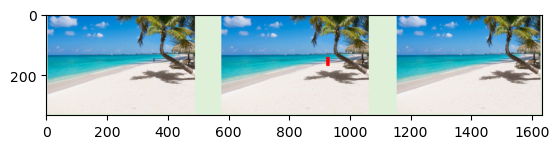

In [28]:
im = plt.imread('img/im_patched.png')
plt.imshow(im)
plt.show()

<b>Pista:</b> Ens hem d'assegurar que els camins mínims sempre passin per l'interior del patch.

In [29]:
def add_patch(im, patch):
    """
    Donada una imatge i un patch. Mostra la imatge amb el patch d'un color donat. Per defecte, vermell.
    
    Params
    ======
    :im: La imatge a la que volem afegit el patch
    :patch: Patch amb quatre coordenades. Format: [(i1,j1), (i2, j2)]
    
    Returns
    =======
    :im: Imatge amb els píxels del patch en vermell.
    """
    im_2 = im.copy()
    
    for i in range(patch[0][0], patch[1][0]+1):
        for j in range(patch[0][1], patch[1][1]+1):
            im_2[i][j] = [1,0,0]
            
    return im_2


def change_gradient(mat, i2,i1,j2,j1):
    
    im = mat.copy()
    
    for i in range(i1, i2+1):
        for j in range(j1, j2+1):
            im[i][j] = -1000*j  # d'aquesta manera sempre eliminarem primer la columna de la dreta
    
    return im
    
def remove_patch(im, patch):
    """
    Donada una imatge i un patch, n'elimina tots els punts interiors al patch.
    Useu la funció 'show_row' al finalitzar per mostrar una figura amb tres subfigures:
        - Imatge original
        - Imatge amb el patch de color vermell
        - Imatge resultant després d'eliminar el patch
    
    Params
    ======
    :im: Imatge original
    :patch: Patch amb dos parells de coordenades. 
            Format: [(i1,j1), (i2, j2)]. Sempre se satisfà que i1<i2, j1<j2.
            (i1, j1) és la coordenada superior esquerra del patch
            (i2, j2) és la coordenada inferior dreta del patch.
            Aquestes dues parelles s'han d'incloure com a part del patch.
    """
    
    result = [(im, 'IMATGE INICIAL')]
    
    i2 = patch[1][0]
    i1 = patch[0][0]
    j2 = patch[1][1]
    j1 = patch[0][1]
    
    # 1a iteració per veure el quadre a eliminar
    im_gradient = get_gradient(im)
    
    im_2 = im.copy()
    im_2 = add_patch(im, patch)
        
    result.append((im_2, 'QUADRE A ELIMINAR')) 
    
    im_gradient = change_gradient(im_gradient, i2,i1,j2,j1)
    
    gradient_paths = minimal_paths(im_gradient)
        
    cut = find_min_path(gradient_paths)       
        
    new_im = delete_path(im, cut)
    
    j2 = j2 -1
    
    while(j2-j1 >= 0): # es fa les operacions tan gran com ampla es la foto
        
        im_gradient = get_gradient(new_im) # calculem el gradient
        
        im_gradient = change_gradient(im_gradient, i2,i1,j2,j1) # modificquem el gradient del quadrat a eliminar
        
        gradient_paths = minimal_paths(im_gradient) # trobem la matriu de gradient graduel de dalt a baix
        
        cut = find_min_path(gradient_paths) # trobem el cami minim
        
        new_im = delete_path(new_im, cut) # eliminem aquest cami que segur que passa pel patch
        
        j2 = j2 -1 #restem una columna
    
    result.append((new_im, 'IMATGE FINAL'))
    
    show_row(result)

Comproveu la vostra solució.

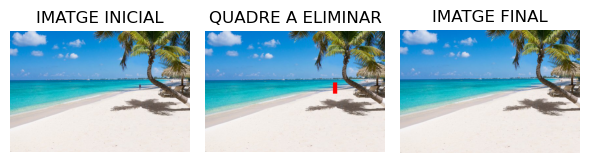

In [30]:
im = plt.imread('img/beach.jpg')/255
patch = [(156,391), (189,403)]

remove_patch(im, patch)